# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.003
-0.003
-0.001
-0.002
-0.003
-0.004
0.999
0.998
0.997
0.998
1.991
1.995
1.996
1.996
1.996
2.997
2.999
3.001
3.001
3.0
3.998
4.0
4.001
4.001
4.001
4.99
4.99
4.989
4.989
5.978
5.978
5.977
5.977
6.785
6.784
6.784
6.784
7.591
7.591
7.591
7.591
8.587
8.589
8.593
8.593
8.592
9.569
9.571
9.574
9.574
9.573
10.553
10.556
10.559
10.558
10.558
11.554
11.556
11.559
11.558
11.558
11.558
12.563
12.562
12.562
13.555
13.557
13.56
13.559
13.56
14.247
14.247
14.246
14.246
14.914
14.92
14.92
14.92
14.92
15.899
15.899
15.899
15.899
16.875
16.874
16.874
16.874
17.872
17.871
17.87
17.87
18.847
18.846
18.846
18.846
19.821
19.821
19.82
19.82
20.797
20.797
20.796
21.404
21.403
21.403
22.019
22.019
22.017
22.017
23.017
23.017
23.017
23.016
24.016
24.015
24.015
24.014
25.018
25.017
25.017
25.017
26.023
26.023
26.021
26.021
27.028
27.028
27.026


57.976
57.976
57.991
57.992
57.99
57.993
57.993
57.993
57.993
57.991
57.991
57.991
57.99
57.991
57.99
57.99
57.99
57.99
57.99
57.99
57.99
57.99
57.988
57.989
57.988
57.987
57.988
57.988
57.988
57.988
57.988
57.988
57.988
57.988
57.984
57.985
57.985
57.985
57.984
58.032
58.079
58.101
58.101
58.101
58.115
58.116
58.113
58.114
58.114
58.114
58.113
58.112
58.112
58.124
58.124
58.127
58.127
58.126
58.128
58.128
58.128
58.128
58.127
58.126
58.125
58.125
58.125
58.125
58.125
58.125
58.125
58.125
58.125
58.124
58.124
58.124
58.123
58.123
58.123
58.122
58.122
58.122
58.121
58.121
58.121
58.121
58.121
58.122
58.121
58.121
58.121
58.121
58.118
58.118
58.118
58.118
58.117
58.375
58.4
58.4
58.4
58.4
58.399
58.399
58.399
58.399
58.399
58.399
58.398
58.411
58.411
58.411
58.411
58.411
58.411
58.413
58.413
58.412
58.412
58.411
58.411
58.41
58.41
58.41
58.41
58.41
58.41
58.409
58.409
58.409
58.409
58.409
58.408
58.408
58.408
58.408
58.407
58.407
58.407
58.406
58.406
58.406
58.406
58.406
58.406
58.406
58

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1518,3036,60.106
1519,3038,60.106
1520,3040,60.107
1521,3042,60.107


<IPython.core.display.Javascript object>


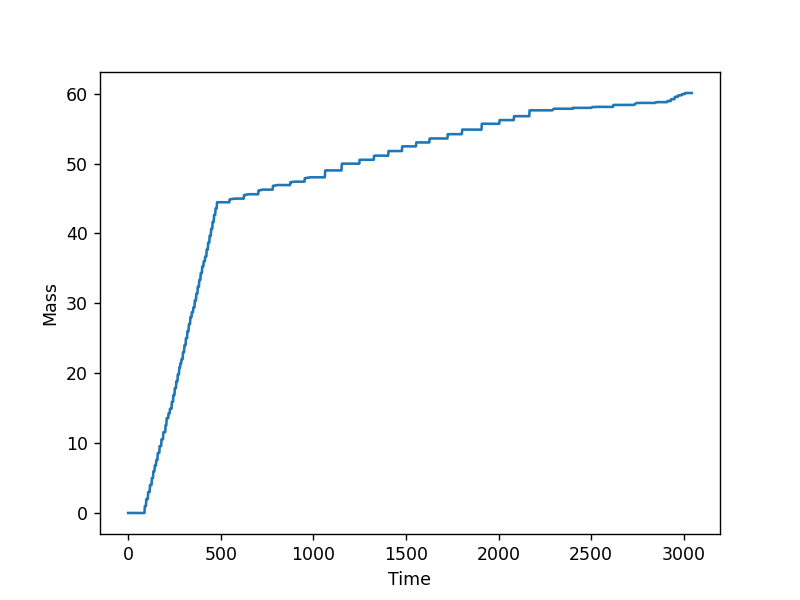

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_140323_S175-180.csv')